<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Exam_Scores_Numpy_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigate, wrangle, add new data to the dataframe, filter and correlate

The following data file contains data about student scores in math, reading and writing.  The exam scores are assumed to be percentages. It also contains data about gender, ethnicity, parental education, whether the student qualifies for free school food and whether or not the student has taken a preparation course for the exams.  The data set has already been cleaned. 

1.  Investigate the data set.

2.  Create numpy arrays to hold each of the three sets of scores.  
Create a new numpy array to hold the average exam score (of the three scores for each student)
Add the new numpy array as a new column in the dataframe.

3.  Filter the original dataset into a new dataframe containing just the females.  Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column.

4.  Do the same for the males.

5.  Use the original dataset to find the correlation coefficient for reading and maths.  How closely do they correlate?  Write what you find in a text box below the code.

6.  Do the same for reading and writing. What do you find?

7.  You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)



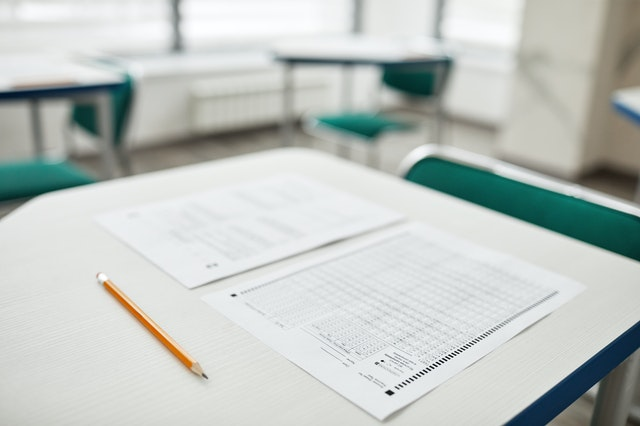



The dataset can be accessed here:  https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv.  This is a .csv file.

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

*Photo by Andy Barbour from Pexels*

# Investigating the data set
---
The data set will be now called 'scores'. In the next cells the dataframe will be investigated.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"
scores = pd.read_csv(url)
scores






,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
0,female,group E,some college,free/reduced,none,65,76,71
1,male,group C,some college,standard,completed,75,72,69
2,female,group B,some high school,free/reduced,completed,62,56,61
3,male,group D,some high school,standard,completed,60,60,59
4,female,group C,high school,free/reduced,completed,34,54,55
...,...,...,...,...,...,...,...,...
995,male,group B,some college,standard,completed,80,73,74
996,male,group D,high school,standard,completed,82,87,82
997,female,group C,associate's degree,standard,completed,65,94,93
998,male,group B,master's degree,free/reduced,none,62,62,57


In [ ]:
scores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   preparation_course  1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The data set comprises of 7 columns and 1000 rows. There are also no NaN values.

#2. Calculating the average of maths, reading and writing scores

To analyse the data numpy arrays will be created to hold the maths, reading and writing scores. In addition, the average  of all three scores will be calculted and a added to the dataframe as a new column called 'average score'



In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"
scores = pd.read_csv(url)

def student_scores():
  
  #2. Create numpy arrays to hold each of the three sets of scores (math, reading, writing)
  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)

  #Create a new numpy array to hold the average exam score (of the three scores for each student)
  #average = np.mean([[math_score],[reading_score], [writing_score]]) #new array called average
  average = (math_score + reading_score + writing_score)//3
  
  #Add the new numpy array as a new column in the dataframe.
  scores['average_scores'] = average.tolist() #add a new column 'average_scores to the original dataframe called scores
  #df['new column name'] = numpyarrayname.tolist()
  return   scores.head()#average 

student_scores()

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,average_scores
0,female,group E,some college,free/reduced,none,65,76,71,70
1,male,group C,some college,standard,completed,75,72,69,72
2,female,group B,some high school,free/reduced,completed,62,56,61,59
3,male,group D,some high school,standard,completed,60,60,59,59
4,female,group C,high school,free/reduced,completed,34,54,55,47


Maths, reading and writing scores are now stored as numpy arrays in  **math_score, reading_score and writing_score**. The variable **average** holds the calculated mean all three scores per student which has now been added to the dataframe as an extra column.

# 3. Filtering the dataframe for females only

First, a new dataframe will be created containing all scores of females only before proceding to calculate the average of all scores.

In [ ]:
def student_scores():

  #storing the scores as numpy arrays
  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)

  #Filtering the dataset for females only
  female_only_scores = scores[scores['gender']=='female'] #filtered scores into a new dataframe called FEMALE SCORES

  #finding the mean of the average column 'average_scores'.
  mean_average_fcolumn=female_only_scores['average_scores'].mean()

  return female_only_scores, mean_average_fcolumn


student_scores()

(     gender ethnicity  parental_education         lunch preparation_course  \
 0    female   group E        some college  free/reduced               none   
 2    female   group B    some high school  free/reduced          completed   
 4    female   group C         high school  free/reduced          completed   
 5    female   group B        some college  free/reduced               none   
 6    female   group D        some college      standard               none   
 ..      ...       ...                 ...           ...                ...   
 989  female   group D  associate's degree      standard          completed   
 991  female   group C        some college      standard               none   
 992  female   group C        some college  free/reduced               none   
 994  female   group D  associate's degree      standard          completed   
 997  female   group C  associate's degree      standard          completed   
 
      math_score  reading_score  writing_score  av

*Because the original dataframe was changed when the column 'average_score' was added when only female scores are filtered a new average score per female student does not need to be recalculated again (see results above). 
The average of the column 'average_scores' was 70.49%.*

#4. Filtering dataframe for males only
---
A new dataframe will be created in which only male data will be stored.

In [ ]:
def student_scores():

  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)


  #4. MALES ONLY
  male_only_scores = scores[scores['gender']=='male']  #filtered scores into a new dataframe called MALE SCORES
  #average_male_scores=(math_score + reading_score + writing_score)//3 #calculation the mean of three scores for each row
  #male_only_scores["average_scores"]=average_male_scores #adding a new column called average_scores to male only dataset

  #finding the mean of the average_scores column
  mean_average_mcolumn=male_only_scores['average_scores'].mean() 

  return male_only_scores, mean_average_mcolumn

student_scores()

(    gender ethnicity  parental_education         lunch preparation_course  \
 1     male   group C        some college      standard          completed   
 3     male   group D    some high school      standard          completed   
 7     male   group E    some high school      standard               none   
 9     male   group C  associate's degree      standard          completed   
 13    male   group C        some college      standard               none   
 ..     ...       ...                 ...           ...                ...   
 993   male   group E         high school      standard               none   
 995   male   group B        some college      standard          completed   
 996   male   group D         high school      standard          completed   
 998   male   group B     master's degree  free/reduced               none   
 999   male   group B        some college      standard               none   
 
      math_score  reading_score  writing_score  average_scores

As with the female data, the male data did not need to have the average of all three scores recalculated since the dataframe only contined the column 'average_scores'. The mean of all rows in the

# 5. Find the correlation coefficient between reading and maths using the original dataset. How closely do they correlate? 
---


array([[1.        , 0.81459752],
       [0.81459752, 1.        ]])

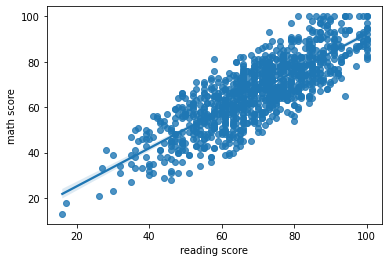

In [ ]:
def student_scores():
  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)


  #Use the original dataset (SCORES) to find the correlation coefficient for reading and maths (READING_SCORE, MATH_SCORE)
  coeff_read_math=np.corrcoef(reading_score, math_score)

  x=scores["reading_score"]
  y=scores["math_score"]

  regression=linregress(x,y) 
  slope= regression.slope
  intercept=regression.intercept
  regression

  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('reading score')
  chart.set_ylabel('math score')
  chart


  #array([1.,0.81][0.81459, 1.])->value of 0.81 suggests that there is a high correlation between the two variables (those who can read are also most probably good at maths)
  return coeff_read_math

student_scores()

*There is a strong positive correlation between the reading and the maths score (r=0.81).*

#5. Find the correlation coefficient between reading and writing using the original dataset. How closely do they correlate?

array([[1.        , 0.95676863],
       [0.95676863, 1.        ]])

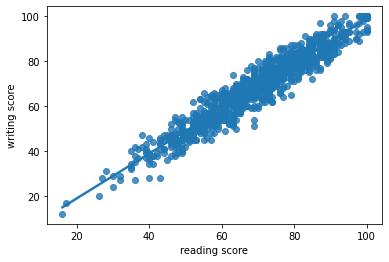

In [ ]:

def student_scores():

  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)
  
  # Coeff between reading and writing
 
  coeff_reading_writing=np.corrcoef(reading_score, writing_score)
  x=scores["reading_score"]
  y=scores["writing_score"]

  regression=linregress(x,y) 
  slope= regression.slope
  intercept=regression.intercept
  regression

  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel('reading score')
  chart.set_ylabel('writing score')
  chart


  return coeff_reading_writing
#correlation 1., 0.95676 indicating a high correlation between the two variables (reading & writing)
 
student_scores() 


 There  is an even stronger positive correlation between reading and writing scores (r=0.96) than it was between reading and maths (r=0.81).

#6. Comparing the average scores between pupils on free and standard lunch 
---
Using the original dataframe 'score' the score of pupils on free and standard lunch will be compared.

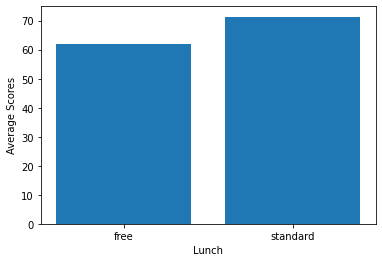

,lunch,average_scores
0,free/reduced,70
1,standard,72
2,free/reduced,59
3,standard,59
4,free/reduced,47
...,...,...
995,standard,75
996,standard,83
997,standard,84
998,free/reduced,60


In [ ]:
def student_scores():
  
 #Create numpy arrays to hold each of the three sets of scores (math, reading, writing)
  math_score=scores["math_score"].to_numpy(np.int64)
  reading_score=scores["reading_score"].to_numpy(np.int64)
  writing_score=scores["writing_score"].to_numpy(np.int64)

  #Create a new numpy array to hold the average exam score (of the three scores for each student)
  average = (math_score + reading_score + writing_score)//3
  
  #Add the new numpy array as a new column in the dataframe -> df['new column name'] = numpyarrayname.tolist()
  scores['average_scores'] = average.tolist() 
  
   #return  exams.head()#average 
  
   #create new dataframe called lunches that hold 'lunch' and 'average_scores'
  lunches=scores[['lunch','average_scores']]
  #use to new df called /lunches/ to see if being on free lunch affects average score
  data=lunches.groupby(['lunch'])['average_scores'].mean()#grouping the data in just two columns
  labels=['free','standard']
  plt.xlabel('Lunch')
  plt.ylabel('Average Scores')
  plt.bar(labels,data)#bar chart x=labels y=data
  plt.show()

  return lunches 
student_scores()

## CONCLUSION
---
*Even though reading and maths are thought to be distinct academic skills, they are highly correlated with one another. In fact, learning disabilities in reading often are encountered with a dissability to 'read' maths (G.A. Torre, A.A. Matejko, G.F Eden, The relationship between brain structure and proficiency in reading and mathematics in children, adolescents, and emerging adults, Developmental Cognitive Neuroscience, Volume 45, 2020) Simmilarly, reading and writing has long been associated with higher test scores from a young age ( Clark, C. (2016). Children’s and Young People’s Reading in 2015. Findings from the National Literacy Trust’s annual survey 2015. London: National Literacy Trust.) Pupils who read, write and do maths. The strong positive correlation seen between reading and maths score and between reading and writing scores support findings mentioned above on reading, writing and numerical skills. 
A comparison of the average scores between pupils on free school meals and those on standard lunches showed a better score by the latter group. Although this is in line with previous studies that showed a mixed impact of free school meals on academic attainment more analysis is needed to determined the significance of the results obtained here. Analysis on the average scores between male and female pupils showed that females tend to have a higher average score  than their male counterparts. It has been previously reported that girls outperform boys at school. Although this initially might point towards a sex-based difference in reality the differences are a result of a combination of attitudes and social factors (https://www.theguardian.com/education/2021/aug/13/girls-overtake-boys-in-a-level-and-gcse-maths-so-are-they-smarter)*


# REFLECTION
---

This was the first miniproject using Numpy arrays. A thing to note for future projects is to make a copy of the original cleaned dataframe before further wrangling since once a dataframe  has been transformed (e.g by adding a column) it remains transformed.

### Helpful references
---

Filtering on criteria using df references:  
`filtered_df = df[df['column name' == value]]`  

Filtering on multiple criteria using df reference:  
`filtered_df = df[df['first column name' == value] & df[second column name] >= value]`

Numpy help sheet:  http://datacamp-community-prod.s3.amazonaws.com/da466534-51fe-4c6d-b0cb-154f4782eb54

